In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r'C:\Users\Ravin\Downloads\updated1_survey.csv')
encoder=LabelEncoder()
for col in data.columns:
    data[col]=encoder.fit_transform(data[col])

In [3]:
scaler=StandardScaler()
scaler.fit(data)

,copy,True
,with_mean,True
,with_std,True


In [4]:
x=data.drop(['Age'],axis=1,inplace=False)
target=data['Age']
x_train,x_test,target_train,target_test=train_test_split(x,target,test_size=0.5,random_state=42)
categorical = x.select_dtypes(include='int').columns.tolist()
preprocessor=ColumnTransformer([
    ('cat',OneHotEncoder(handle_unknown='ignore'),categorical)
])

model_pipeline=Pipeline([
    ('preprocess', preprocessor),
    ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5))
])

In [5]:
model_pipeline.fit(x_train, target_train)
prediction = model_pipeline.predict(x_test)

print(f"R2 Score:{r2_score(target_test, prediction):.4f}")
print(f"MSE:{mean_squared_error(target_test, prediction):.2f}")
print(f"MAE:{mean_absolute_error(target_test, prediction):.2f}")

R2 Score:0.0449
MSE:50.43
MAE:5.51


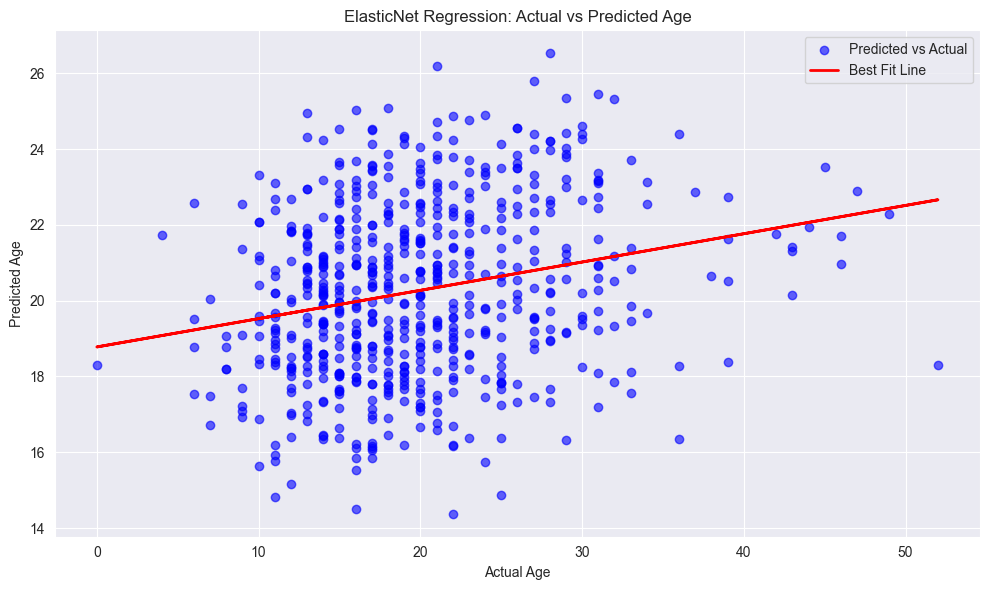

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(target_test, prediction, alpha=0.6, color='blue', label='Predicted vs Actual')
z = np.polyfit(target_test, prediction, 1)
p = np.poly1d(z)
plt.plot(target_test, p(target_test), color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('ElasticNet Regression: Actual vs Predicted Age')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
